# Attrition classification

## 1. Data exploration

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

import warnings
warnings.filterwarnings('ignore');

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv');
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## 2.Data pre-processing

### 2.1 Data cleaning

#### 2.1.1 Drop Duplicates

In [4]:
# check the shape of our data frame
df.shape

(1470, 35)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(1470, 35)

#### 2.1.2 Fill-in missing values

In [6]:
# Check if there is missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missing Value in the dataset

#### 2.1.3 Removing Extreme values

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

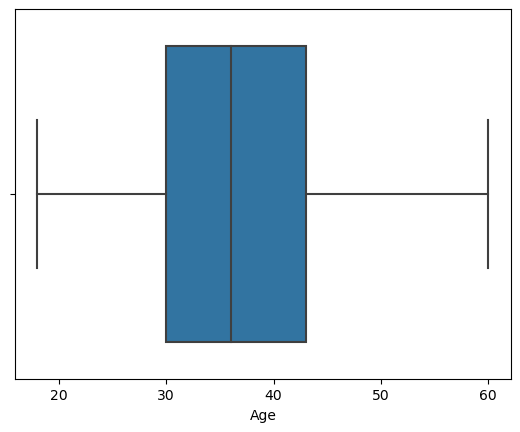

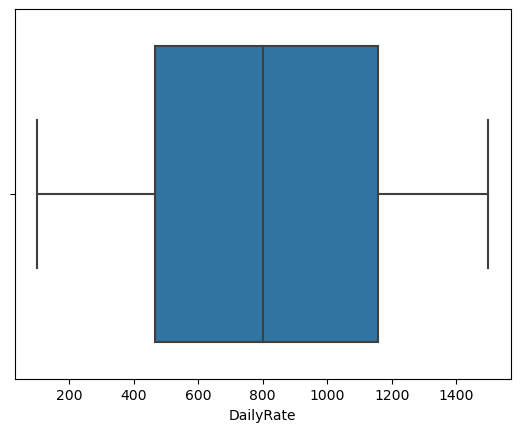

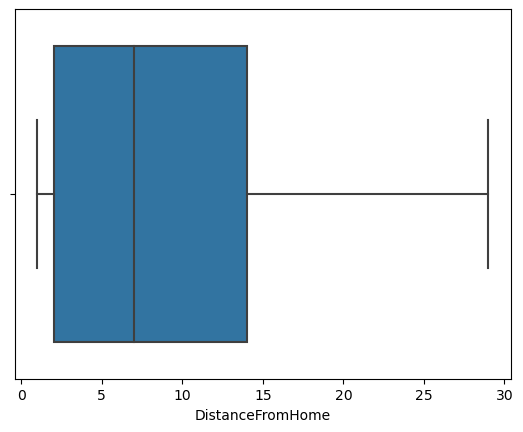

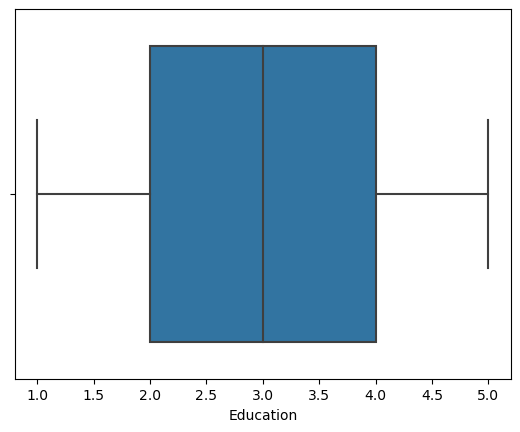

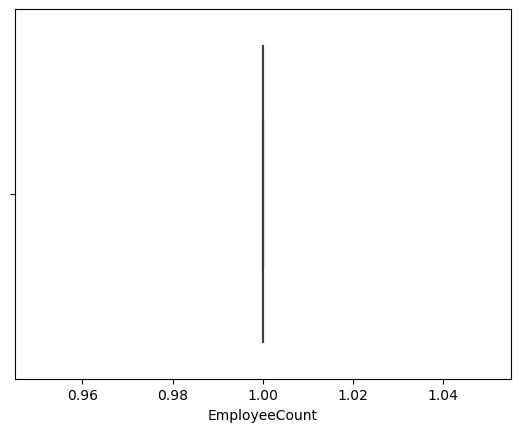

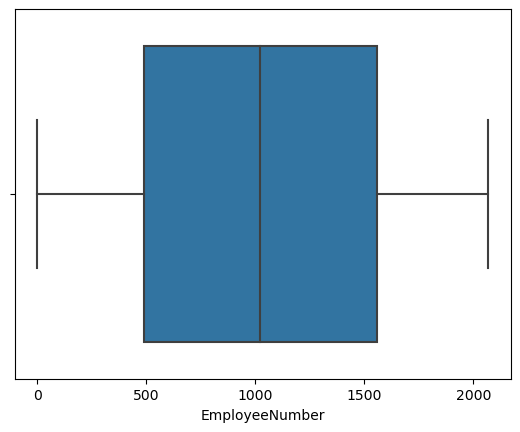

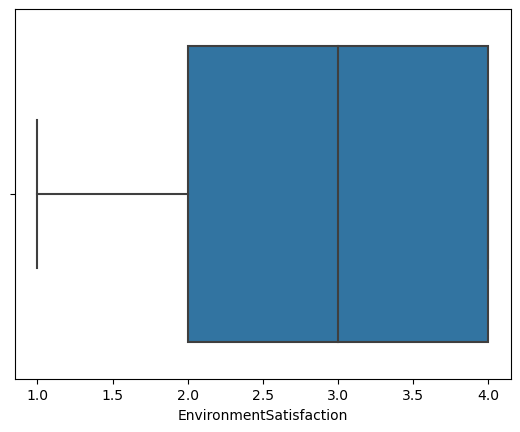

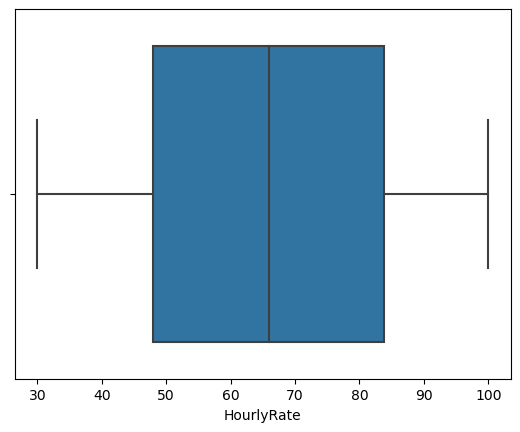

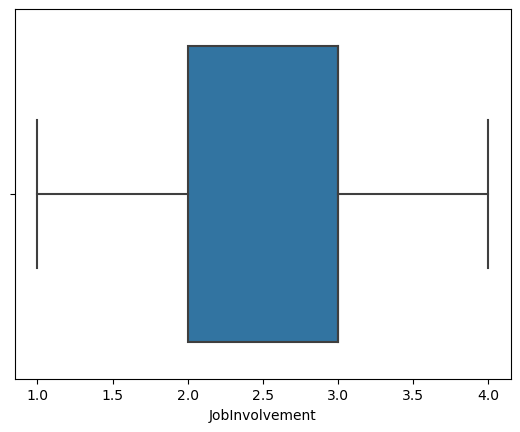

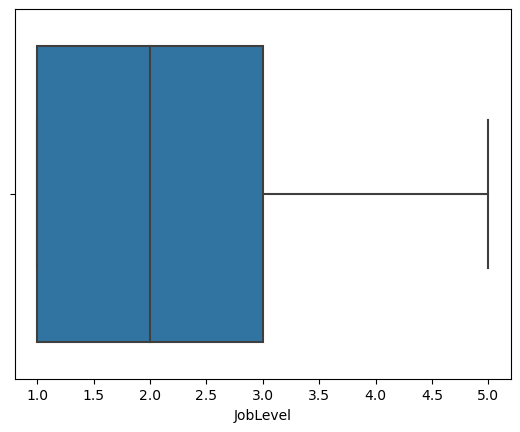

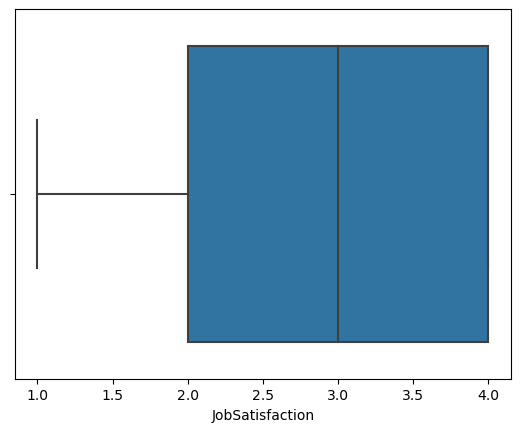

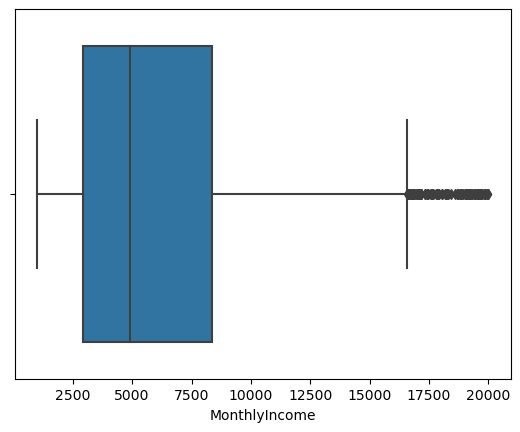

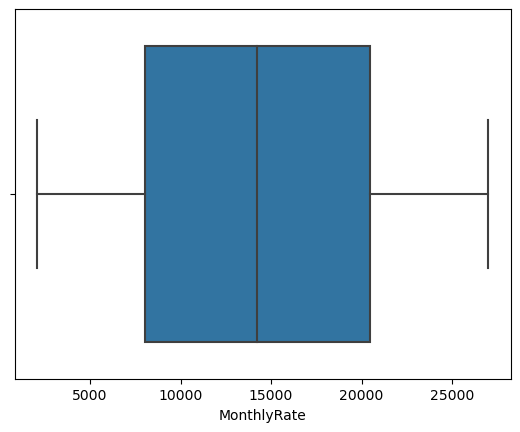

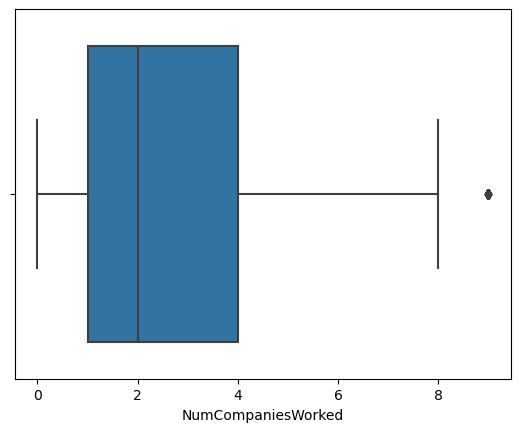

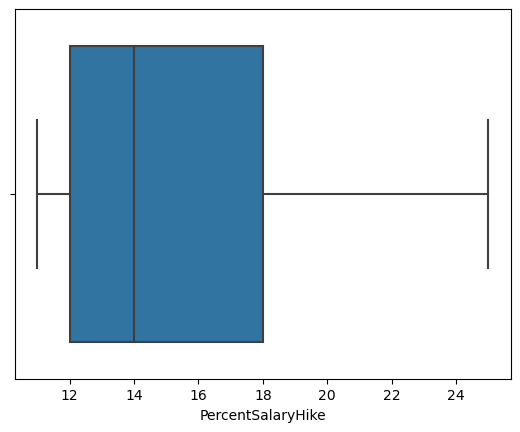

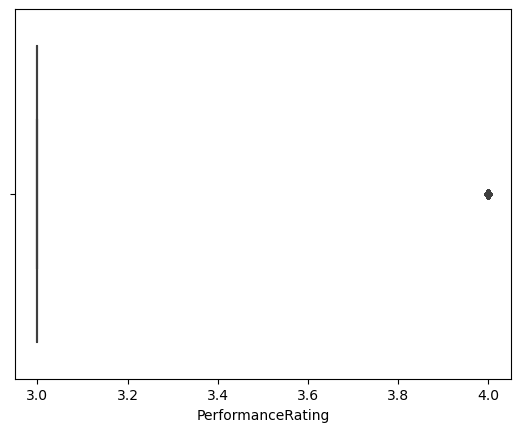

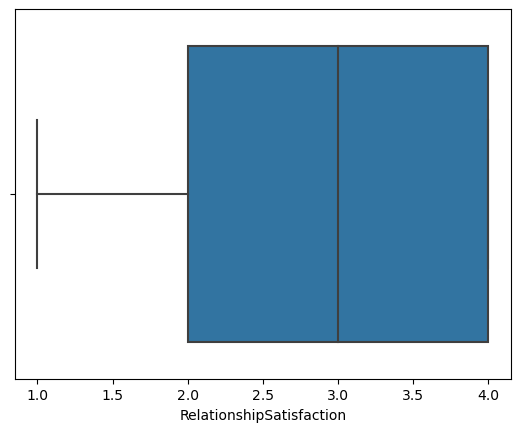

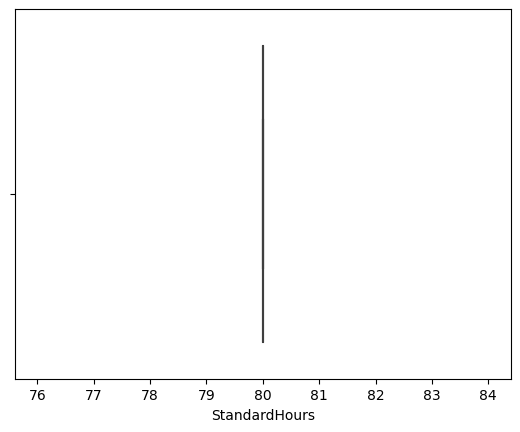

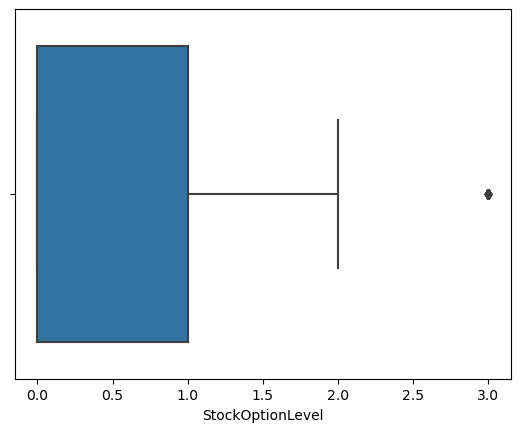

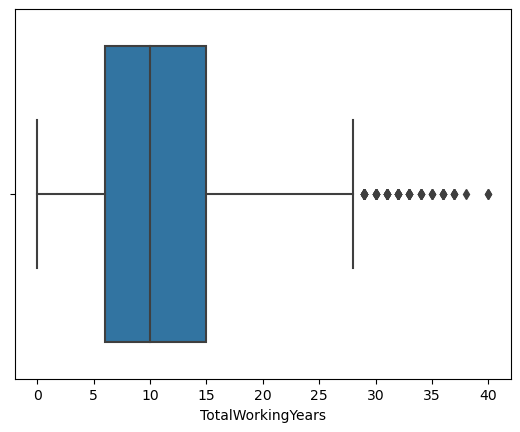

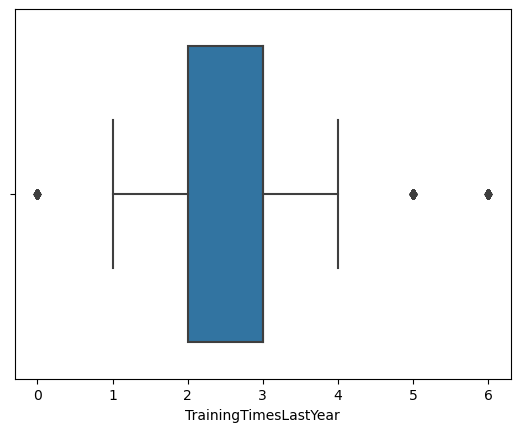

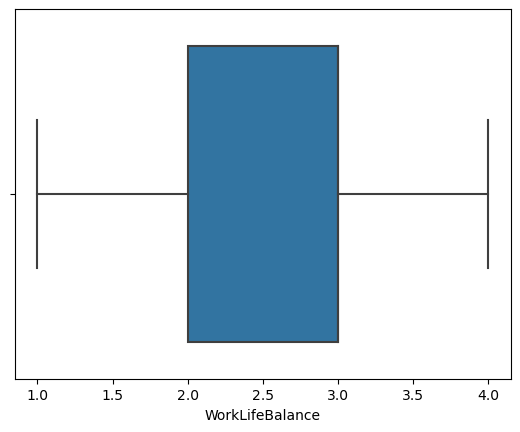

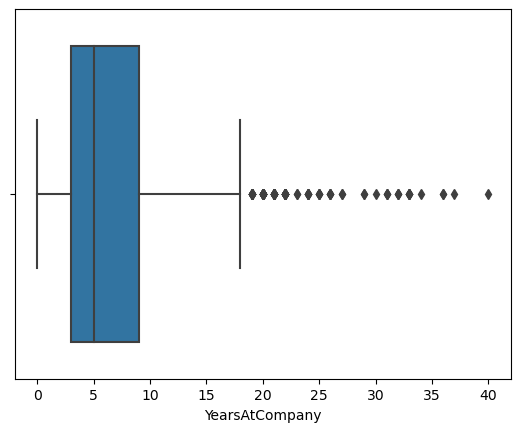

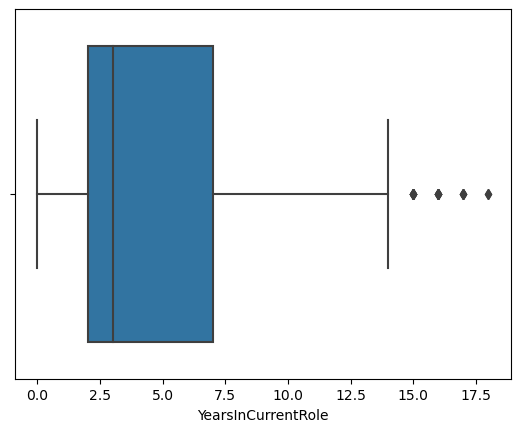

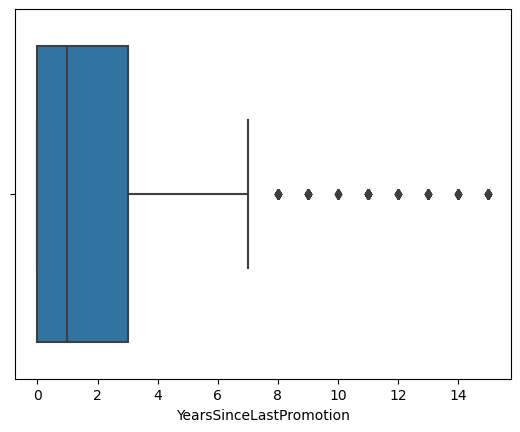

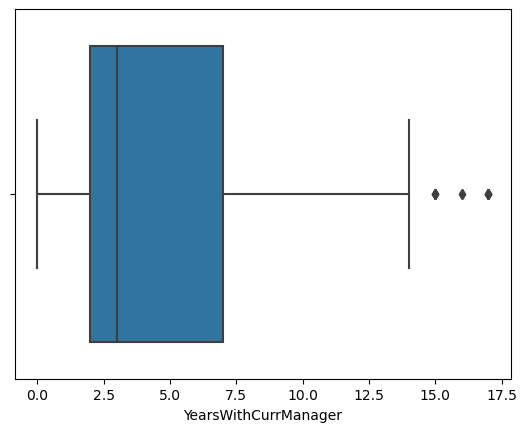

In [8]:
for col in df.columns:
    if(col!='Attrition' and df[col].dtypes=='int64'):
        plt.figure();
        sns.boxplot(df[col]);

In [9]:
def removeOutliers(col):
    q3 = df[col].quantile(.75);
    q1 = df[col].quantile(.25);
    IQR = q3 - q1;
    _max = q3 + (IQR * 1.5);
    _min = q1 - (IQR * 1.5);
    df.loc[df[col] < _min,col] = _min;
    df.loc[df[col] > _max,col] = _max;

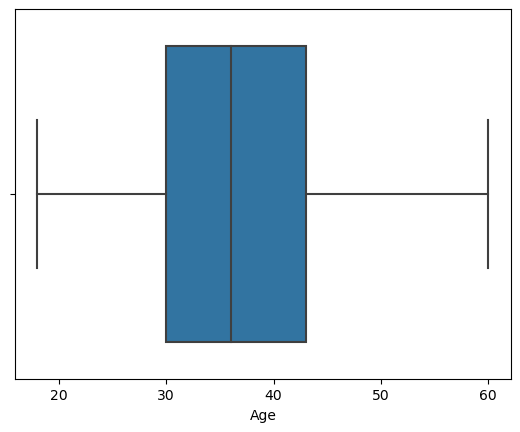

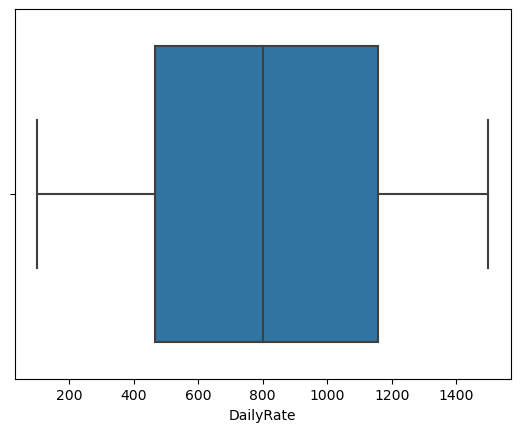

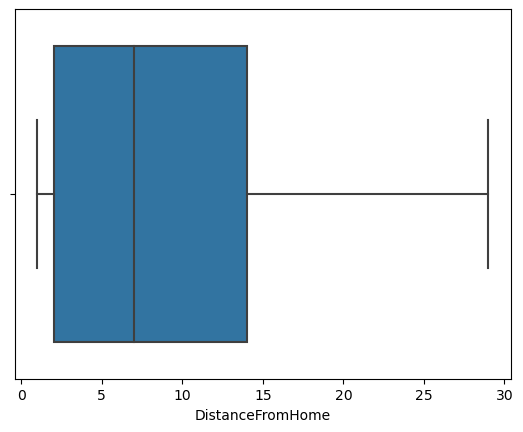

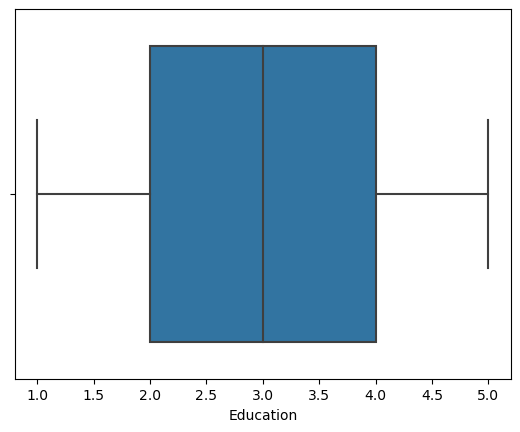

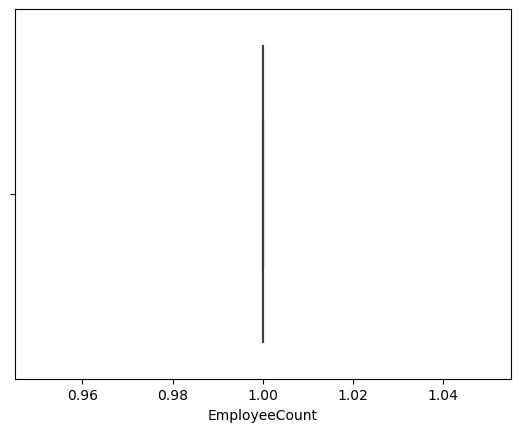

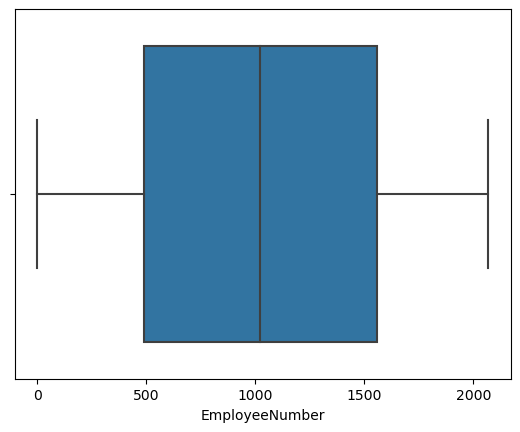

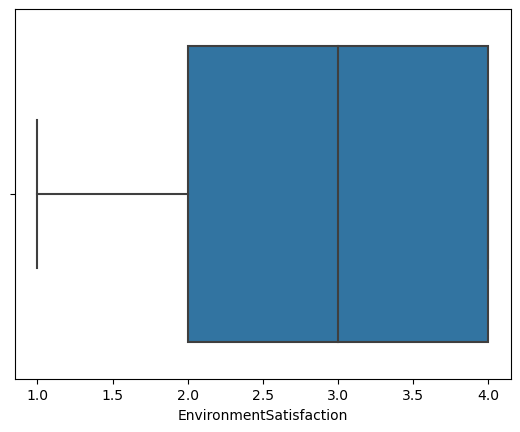

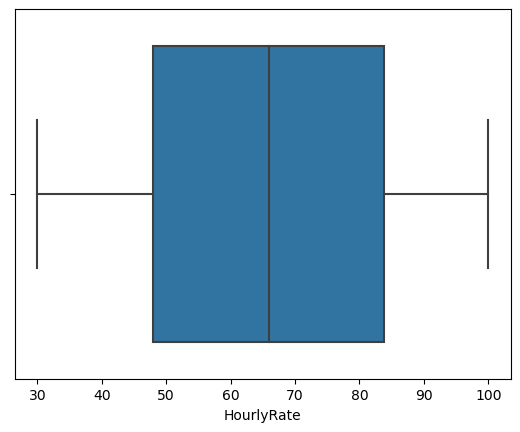

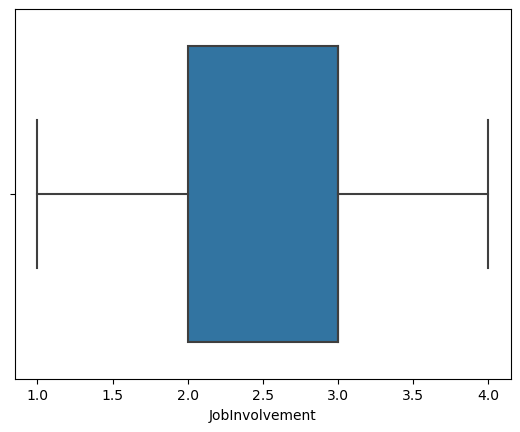

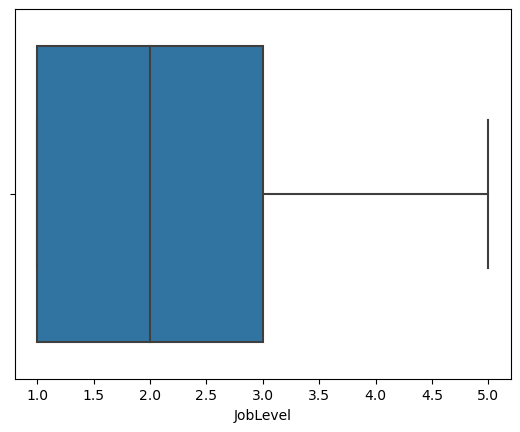

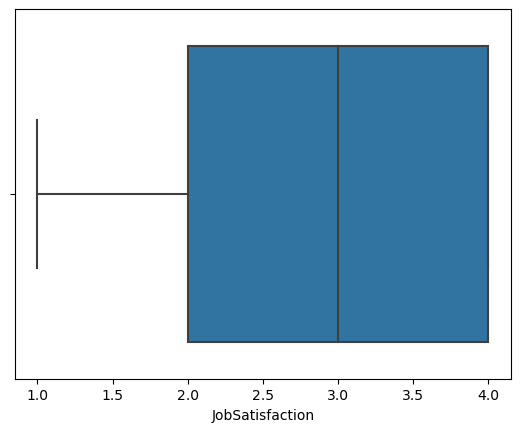

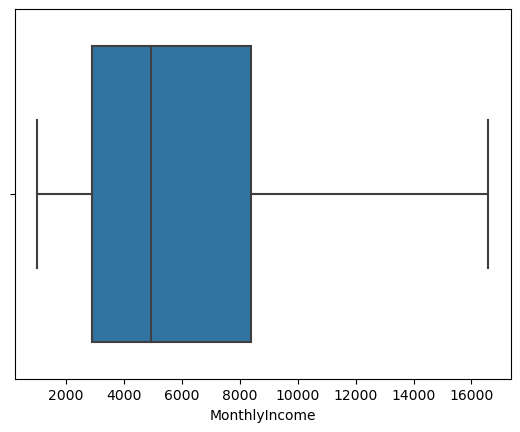

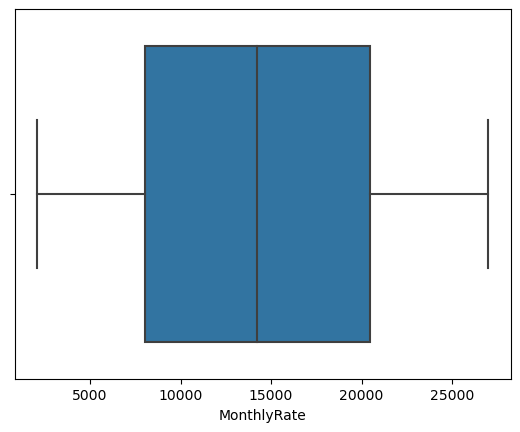

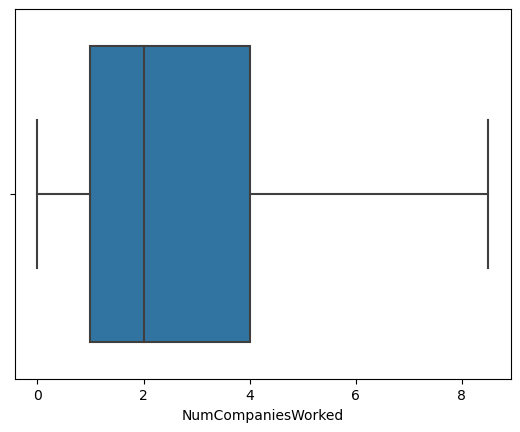

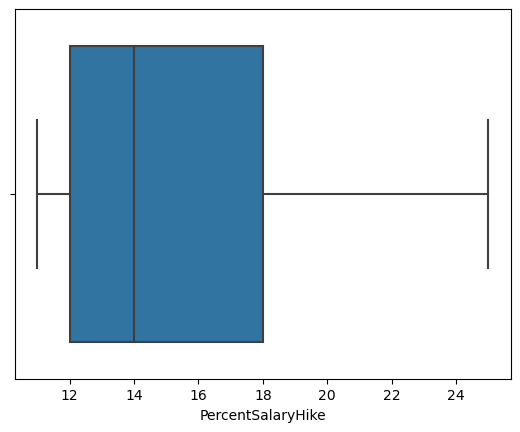

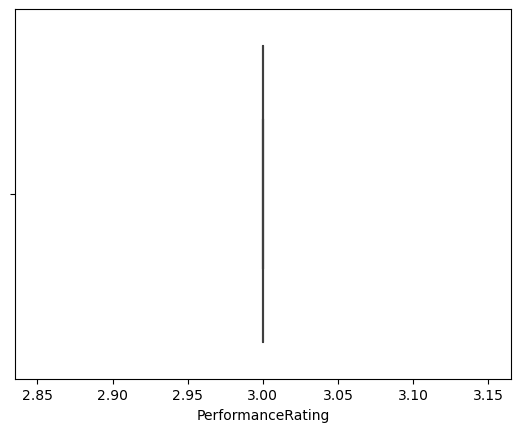

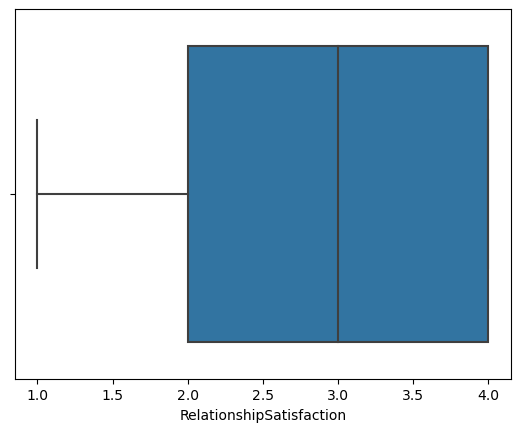

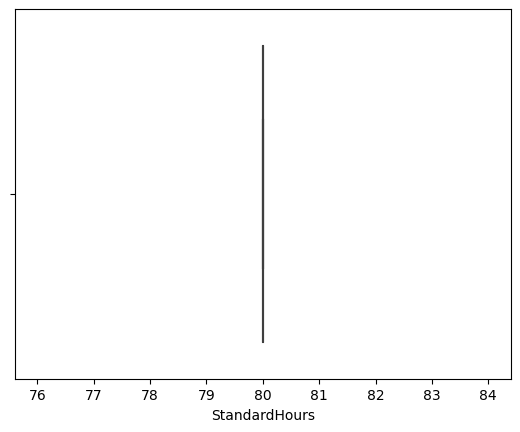

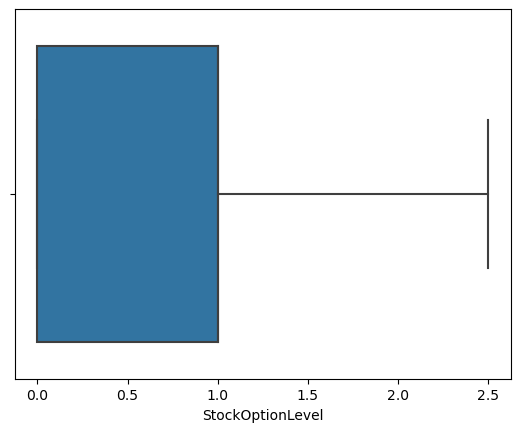

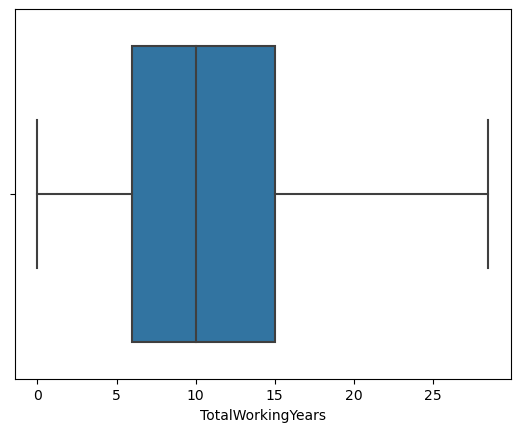

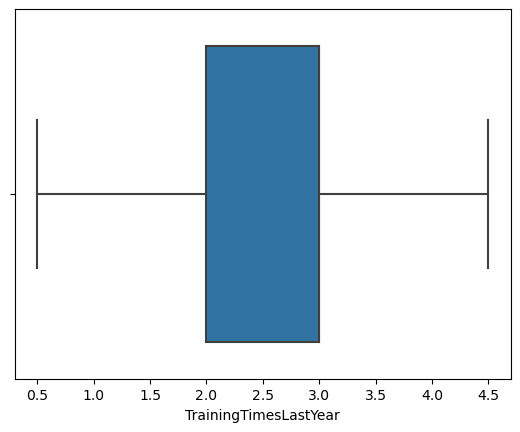

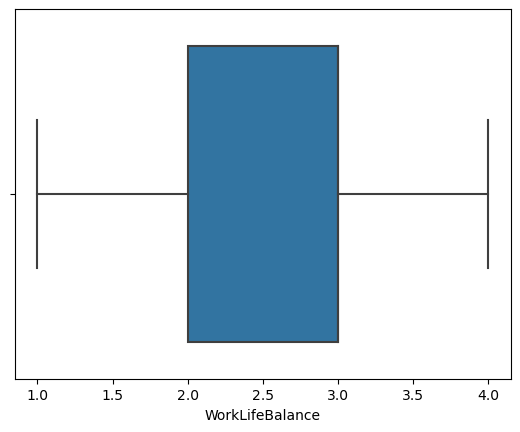

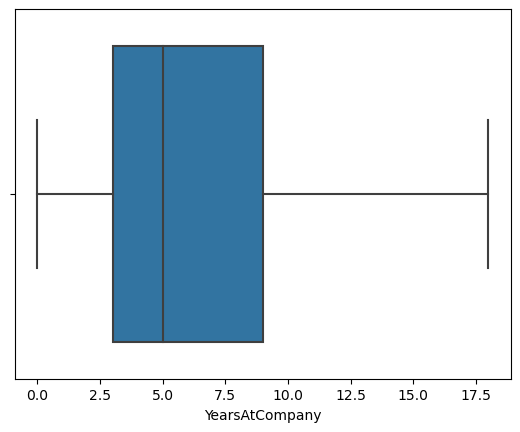

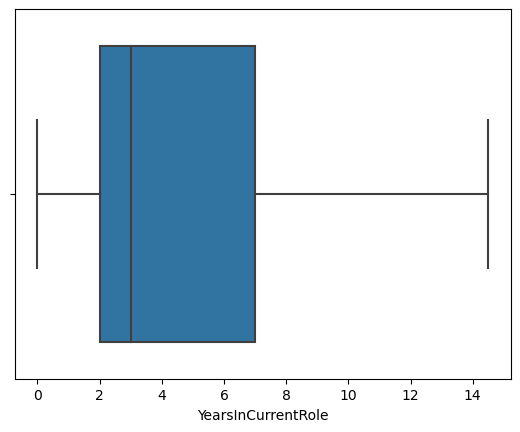

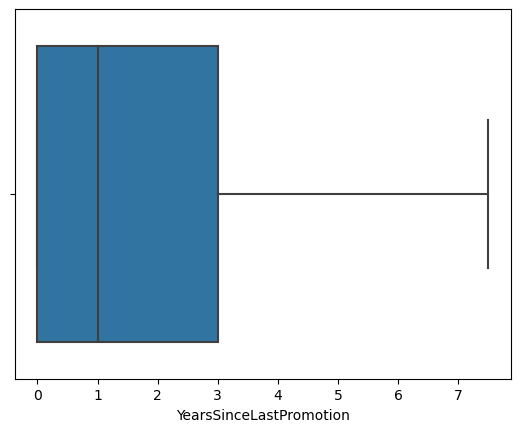

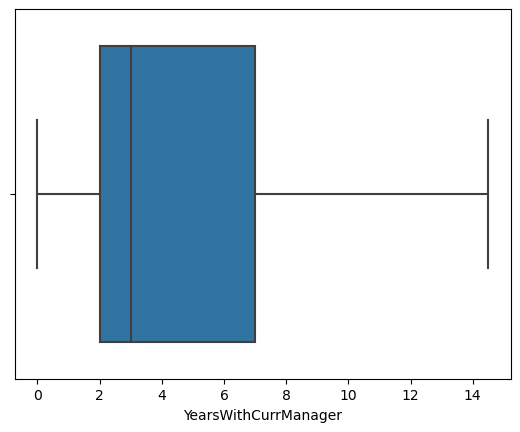

In [10]:
for col in df.columns:
    if(col!='Attrition' and df[col].dtypes=='int64'):
        removeOutliers(col)
        plt.figure();
        sns.boxplot(df[col]);

### 2.2 Converting Categorical Feature into Numerical Features. (Label Encoding)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder();
df_new = df.copy();

In [13]:
for col in df_new.columns:
#     if (col!='Attrition'):
        df_new[col]=encoder.fit_transform(df_new[col]);
        
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,0,1465,...,2,0,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,0,1466,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,0,1467,...,1,0,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,0,1468,...,3,0,0,17,3,1,9,6,0,8


In [14]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_new.copy();
scaler = MinMaxScaler();

In [15]:
for col in df_scaled.columns:
    if(col!='Attrition'):
        df_scaled[col]=scaler.fit_transform(df_scaled[col].values.reshape(-1,1)); #values.reshape to convert to 2D array

In [16]:
df_scaled

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1,1.0,0.705085,1.0,0.000000,0.25,0.2,0.0,0.000000,...,0.000000,0.0,0.000000,0.275862,0.0,0.000000,0.333333,0.266667,0.000,0.333333
1,0.738095,0,0.5,0.127684,0.5,0.250000,0.00,0.2,0.0,0.000681,...,1.000000,0.0,0.333333,0.344828,0.6,0.666667,0.555556,0.466667,0.125,0.466667
2,0.452381,1,1.0,0.909605,0.5,0.035714,0.25,0.8,0.0,0.001361,...,0.333333,0.0,0.000000,0.241379,0.6,0.666667,0.000000,0.000000,0.000,0.000000
3,0.357143,0,0.5,0.926554,0.5,0.071429,0.75,0.2,0.0,0.002042,...,0.666667,0.0,0.000000,0.275862,0.6,0.666667,0.444444,0.466667,0.375,0.000000
4,0.214286,0,1.0,0.352542,0.5,0.035714,0.00,0.6,0.0,0.002723,...,1.000000,0.0,0.333333,0.206897,0.6,0.666667,0.111111,0.133333,0.250,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0,0.5,0.558192,0.5,0.785714,0.25,0.6,0.0,0.997277,...,0.666667,0.0,0.333333,0.586207,0.6,0.666667,0.277778,0.133333,0.000,0.200000
1466,0.500000,0,1.0,0.369492,0.5,0.178571,0.00,0.6,0.0,0.997958,...,0.000000,0.0,0.333333,0.310345,1.0,0.666667,0.388889,0.466667,0.125,0.466667
1467,0.214286,0,1.0,0.044068,0.5,0.107143,0.50,0.2,0.0,0.998639,...,0.333333,0.0,0.333333,0.206897,0.0,0.666667,0.333333,0.133333,0.000,0.200000
1468,0.738095,0,0.5,0.654237,1.0,0.035714,0.50,0.6,0.0,0.999319,...,1.000000,0.0,0.000000,0.586207,0.6,0.333333,0.500000,0.400000,0.000,0.533333


### 2.3 Feature Selection / Correlation Analysis

<AxesSubplot:>

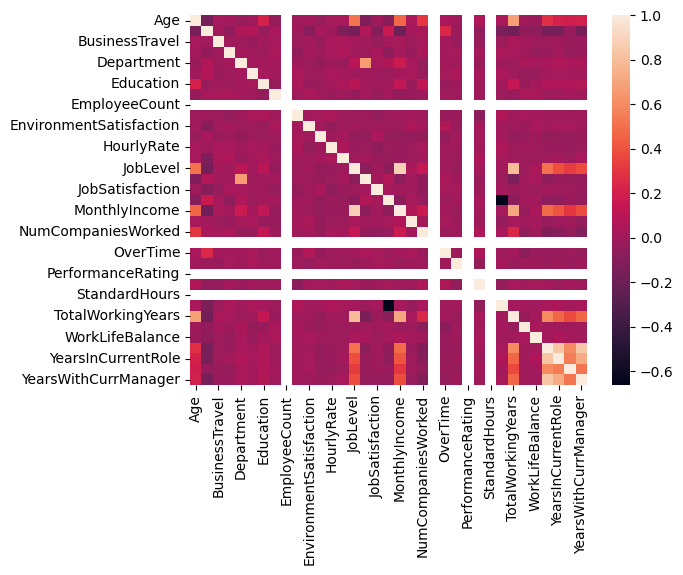

In [17]:
sns.heatmap(df_scaled.corr())

In [18]:
# drop columns to remove any correlation
df_scaled = df_scaled.drop(['StandardHours','PerformanceRating','OverTime','EmployeeCount','Over18'], axis=1)

<AxesSubplot:>

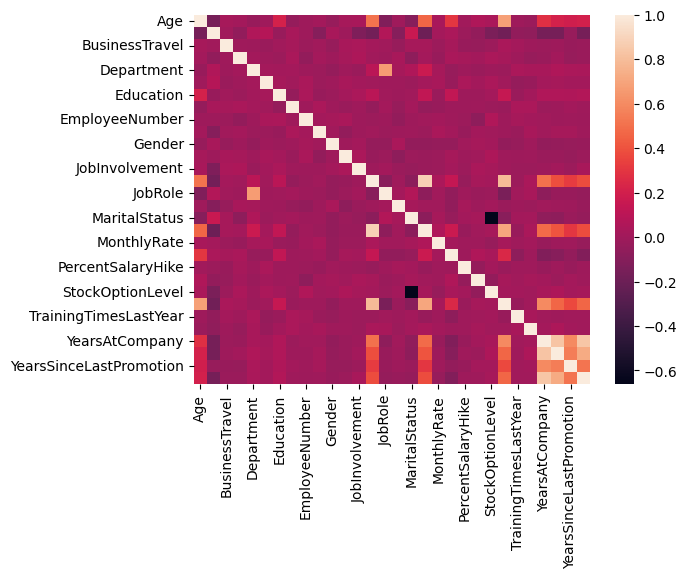

In [19]:
sns.heatmap(df_scaled.corr())

In [20]:
corr = df_scaled.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr,dtype=bool)))
corr_unstacked=corr_mask.unstack().sort_values(ascending=False);
corr_df=pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

In [21]:
corr_df

0
JobLevel       MonthlyIncome         0.880870
               TotalWorkingYears     0.786774
YearsAtCompany YearsInCurrentRole    0.829237
               YearsWithCurrManager  0.833265

In [22]:
df_scaled = df_scaled.drop(['JobLevel','YearsAtCompany', 'YearsWithCurrManager'],axis=1)

<AxesSubplot:>

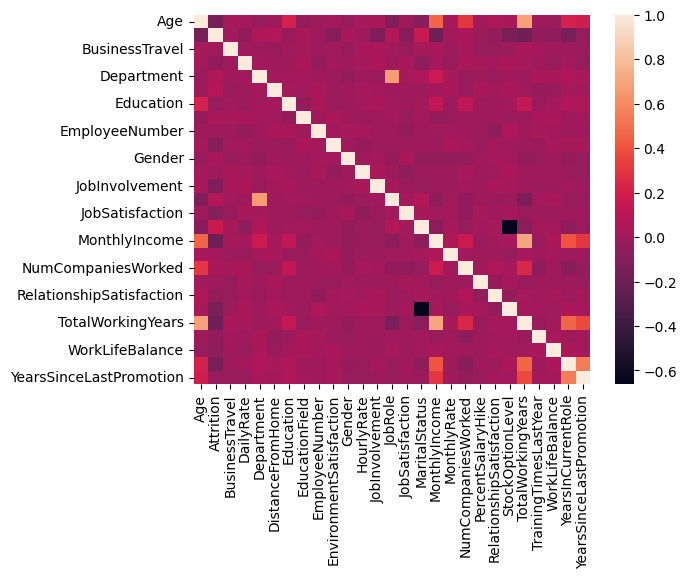

In [23]:
sns.heatmap(df_scaled.corr())

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Split target variable to feature
X = df_scaled.drop(['Attrition'], axis=1)
y = df_scaled['Attrition'];

In [26]:
from sklearn.metrics import confusion_matrix;
from sklearn.metrics import RocCurveDisplay;
from sklearn.metrics import classification_report;

def evaluate_model(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size = .80, stratify = y);
    model.fit(X_train, y_train);
    print(classification_report(y_test,model.predict(X_test),target_names = ['Yes', 'No']));
    print(confusion_matrix(y_test, model.predict(X_test),labels = [0,1]));
    print('Training Score: ', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test));
    RocCurveDisplay.from_estimator(model,X_test,y_test)

## FIND THE BEST MODEL TO USE IN FEATURE SELECTION

              precision    recall  f1-score   support

         Yes       0.85      0.98      0.91       247
          No       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294

[[241   6]
 [ 43   4]]
Training Score:  1.0
Test Score: 0.8333333333333334


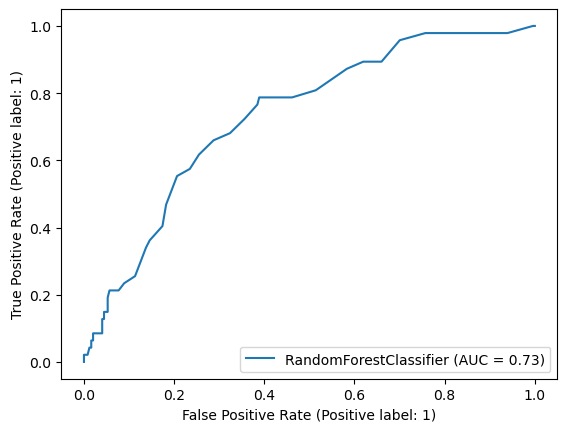

In [27]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier();
evaluate_model(rf,X,y)

              precision    recall  f1-score   support

         Yes       0.87      0.83      0.85       247
          No       0.28      0.36      0.32        47

    accuracy                           0.75       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.78      0.75      0.76       294

[[204  43]
 [ 30  17]]
Training Score:  1.0
Test Score: 0.7517006802721088


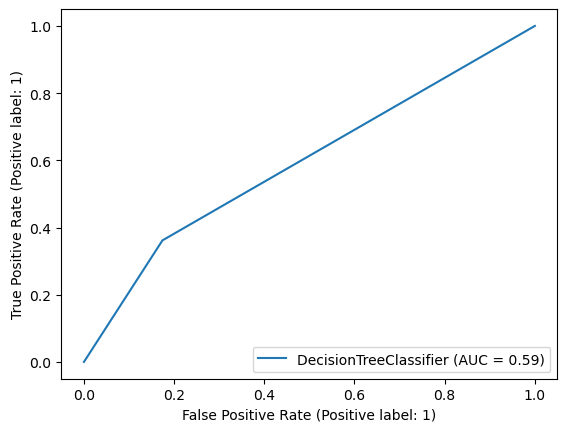

In [28]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
evaluate_model(dt,X,y)

              precision    recall  f1-score   support

         Yes       0.84      0.98      0.90       247
          No       0.17      0.02      0.04        47

    accuracy                           0.83       294
   macro avg       0.50      0.50      0.47       294
weighted avg       0.73      0.83      0.77       294

[[242   5]
 [ 46   1]]
Training Score:  0.8707482993197279
Test Score: 0.826530612244898


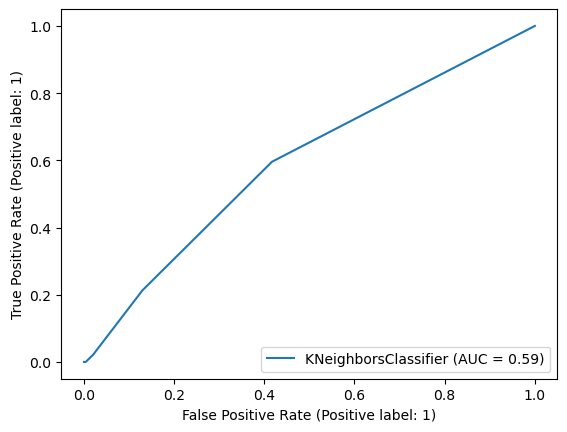

In [29]:
# K-Nearest Neighbors ALgorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
evaluate_model(knn,X,y)

              precision    recall  f1-score   support

         Yes       0.87      0.98      0.92       247
          No       0.67      0.21      0.32        47

    accuracy                           0.86       294
   macro avg       0.77      0.60      0.62       294
weighted avg       0.84      0.86      0.82       294

[[242   5]
 [ 37  10]]
Training Score:  0.8630952380952381
Test Score: 0.8571428571428571


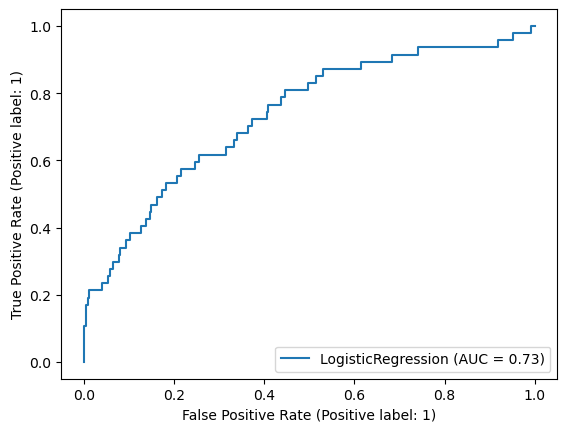

In [30]:
#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
evaluate_model(lr,X,y)

# FEATURE SELECTION

## Filter Methods

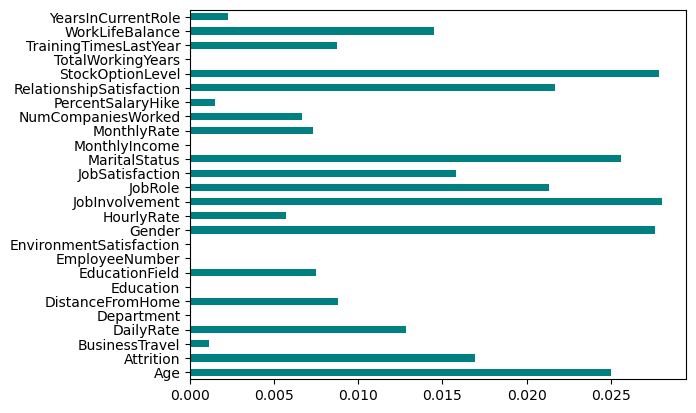

In [31]:
#information gain
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,y);
feat_importances = pd.Series(importances, df_scaled.columns[0:len(df_scaled.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()


In [32]:
#drop feaature with low feature importance lowest
X_ig =X.drop(['PercentSalaryHike', 'JobRole', 'HourlyRate','Gender',
             'EnvironmentSatisfaction','Education', 'Department', 'DailyRate', 'BusinessTravel', 'EmployeeNumber', 
              'EducationField', 'DistanceFromHome', ],axis = 1)

              precision    recall  f1-score   support

         Yes       0.86      0.99      0.92       247
          No       0.70      0.15      0.25        47

    accuracy                           0.85       294
   macro avg       0.78      0.57      0.58       294
weighted avg       0.83      0.85      0.81       294

[[244   3]
 [ 40   7]]
Training Score:  0.8545918367346939
Test Score: 0.8537414965986394


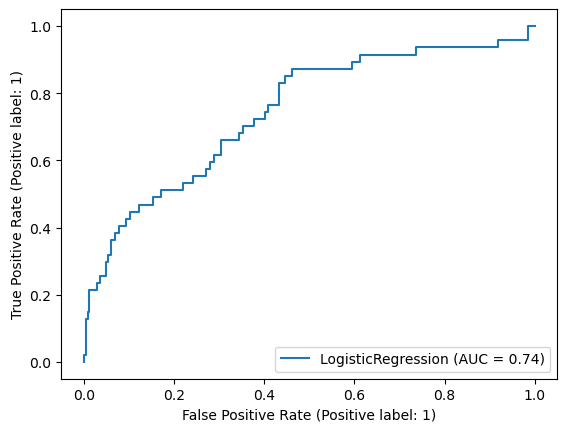

In [33]:
evaluate_model(lr,X_ig,y)

              precision    recall  f1-score   support

         Yes       0.84      1.00      0.91       247
          No       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

[[247   0]
 [ 47   0]]
Training Score:  0.8384353741496599
Test Score: 0.8401360544217688


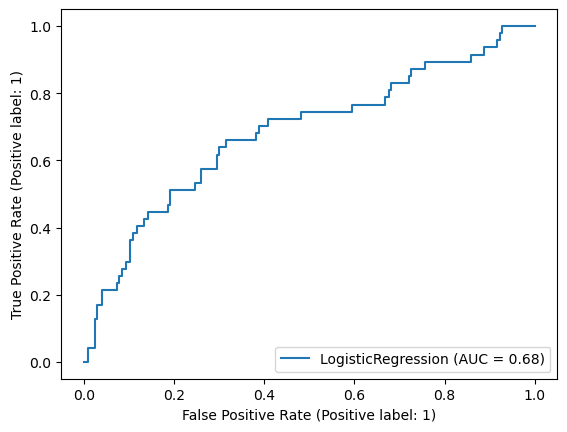

In [34]:
#Chi square test
from sklearn.feature_selection import SelectKBest;
from sklearn.feature_selection import chi2;

chi2_features = SelectKBest(chi2, k = 4); # k is the number of features you want to retain
X_chi2 = chi2_features.fit_transform(X,y);

evaluate_model(lr,X_chi2,y)


In [35]:
#Correlation
corr = df_scaled.corr()
corr['Attrition'] = abs(corr['Attrition'])
corr['Attrition']

Age                         0.159205
Attrition                   1.000000
BusinessTravel              0.000074
DailyRate                   0.056605
Department                  0.063991
DistanceFromHome            0.077924
Education                   0.031373
EducationField              0.026846
EmployeeNumber              0.010369
EnvironmentSatisfaction     0.103369
Gender                      0.029453
HourlyRate                  0.006846
JobInvolvement              0.130016
JobRole                     0.067151
JobSatisfaction             0.103481
MaritalStatus               0.162070
MonthlyIncome               0.196935
MonthlyRate                 0.015273
NumCompaniesWorked          0.043494
PercentSalaryHike           0.013478
RelationshipSatisfaction    0.045872
StockOptionLevel            0.137145
TotalWorkingYears           0.180010
TrainingTimesLastYear       0.057369
WorkLifeBalance             0.063939
YearsInCurrentRole          0.160889
YearsSinceLastPromotion     0.037793
N

In [36]:
#drop -25 features
X_corr = X.drop(['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeNumber','EnvironmentSatisfaction',
                 'Gender','HourlyRate','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus',
                 'MonthlyRate','NumCompaniesWorked','PercentSalaryHike','RelationshipSatisfaction','StockOptionLevel',
                 'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion'], axis=1)

              precision    recall  f1-score   support

         Yes       0.84      1.00      0.91       247
          No       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

[[247   0]
 [ 47   0]]
Training Score:  0.8384353741496599
Test Score: 0.8401360544217688


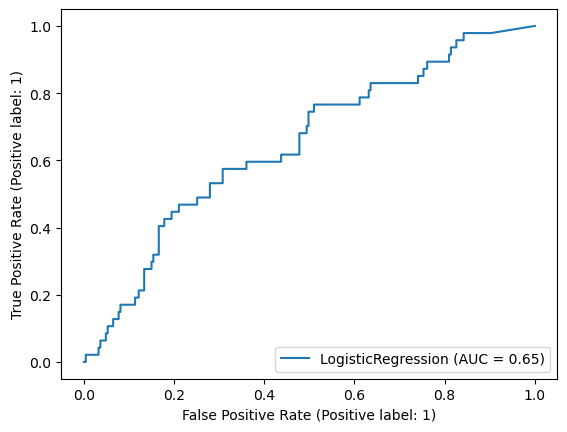

In [37]:
evaluate_model(lr,X_corr,y)

In [38]:
#Variance threshold
from sklearn.feature_selection import VarianceThreshold;

v_threshold = VarianceThreshold (threshold = 0.10);
v_threshold.fit(X)
sp = v_threshold.get_support()

In [39]:
col = X.columns

In [40]:
X_thres = X.copy()
for s,c in zip (sp,col):
    if (s == False):
        X_thres.drop([c] , axis = 1, inplace = True)    

In [41]:
X_thres.columns

Index(['BusinessTravel', 'EnvironmentSatisfaction', 'Gender',
       'JobSatisfaction', 'MaritalStatus', 'RelationshipSatisfaction',
       'YearsSinceLastPromotion'],
      dtype='object')

              precision    recall  f1-score   support

         Yes       0.84      1.00      0.91       247
          No       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

[[246   1]
 [ 47   0]]
Training Score:  0.8392857142857143
Test Score: 0.8367346938775511


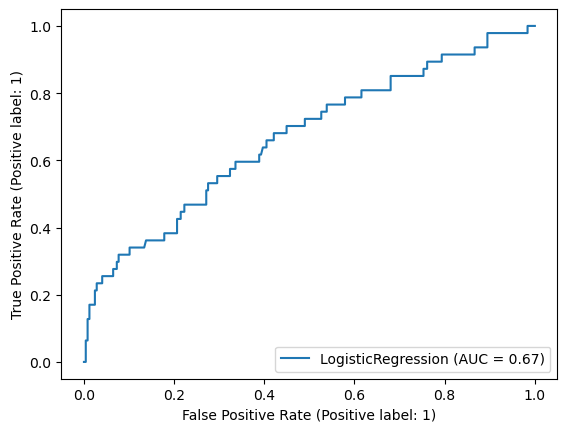

In [42]:
evaluate_model(lr,X_thres,y)

<BarContainer object of 26 artists>

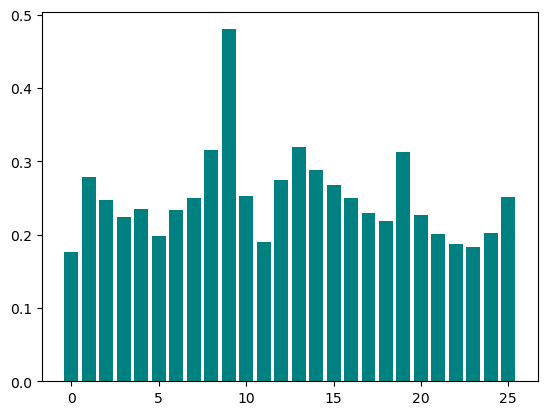

In [43]:
#calculate MAD
mean_abs_diff = np.sum(np.abs(X - np.mean(X,axis = 0)),axis = 0)/X.shape[0];
plt.bar(np.arange(X.shape[1]),mean_abs_diff, color = 'teal')


In [44]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

In [45]:
from sklearn.model_selection import cross_val_score

## Feature Extraction

              precision    recall  f1-score   support

         Yes       0.84      1.00      0.91       247
          No       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

[[247   0]
 [ 47   0]]
Training Score:  0.8384353741496599
Test Score: 0.8401360544217688
<built-in method mean of numpy.ndarray object at 0x000001B4B18A2A50>


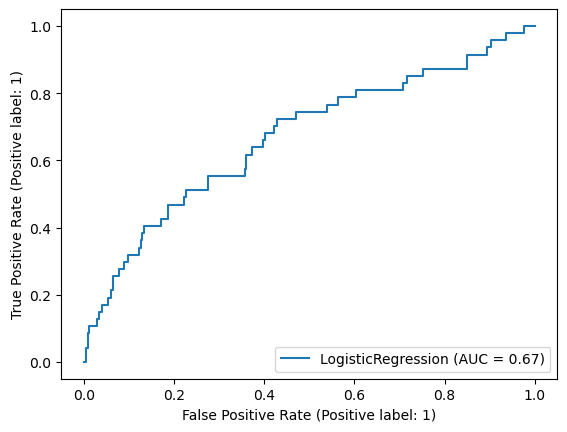

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 3)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data = X_pca,columns = ['PCA1','PCA2','PCA3'])

evaluate_model(lr,pca_df,y)
print(cross_val_score(lr,pca_df,y,cv = 10).mean)

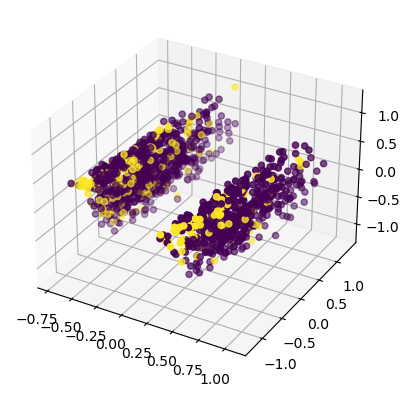

In [47]:
#Visualize the PCA
fig = plt.figure();
ax = fig.add_subplot(projection = '3d');

ax.scatter(pca_df ['PCA1'],pca_df ['PCA2'],pca_df ['PCA3'],
          c = y, marker = 'o')

              precision    recall  f1-score   support

         Yes       0.84      1.00      0.91       247
          No       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

[[247   0]
 [ 47   0]]
Training Score:  0.8384353741496599
Test Score: 0.8401360544217688
<built-in method mean of numpy.ndarray object at 0x000001B4B47BB630>


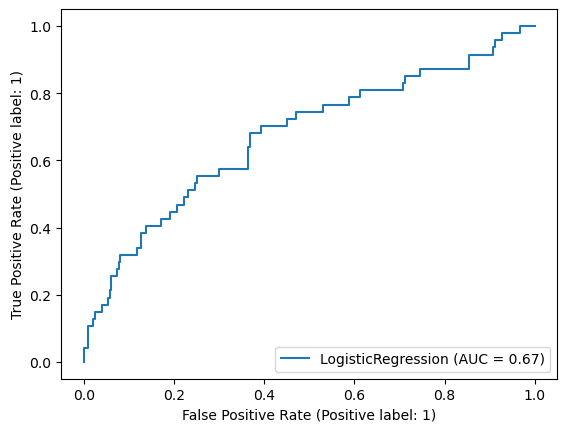

In [48]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components = 3)
X_ica = ica.fit_transform(X)

evaluate_model(lr,X_ica,y)
print(cross_val_score(lr,X_ica,y,cv = 10).mean)

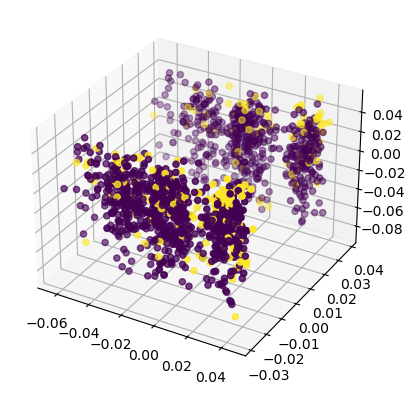

In [49]:
ica_df = pd.DataFrame(data = X_ica,columns = ['ICA1','ICA2','ICA3'])

fig = plt.figure();
ax = fig.add_subplot(projection = '3d');

ax.scatter(ica_df ['ICA1'],ica_df ['ICA2'],ica_df ['ICA3'],
          c = y, marker = 'o')

              precision    recall  f1-score   support

         Yes       0.87      0.97      0.92       247
          No       0.59      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.73      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294

[[240   7]
 [ 37  10]]
Training Score:  0.8613945578231292
Test Score: 0.8503401360544217
<built-in method mean of numpy.ndarray object at 0x000001B4B4390990>


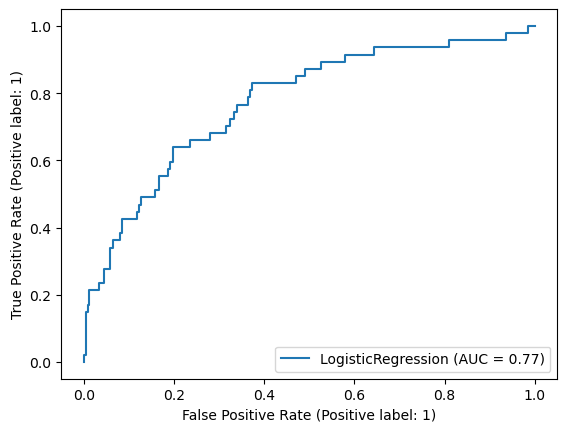

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;

lda = LinearDiscriminantAnalysis(n_components = 1)

X_lda = lda.fit(X,y).transform(X)
evaluate_model(lr,X_lda,y)
print(cross_val_score(lr,X_lda,y,cv = 10).mean)

              precision    recall  f1-score   support

         Yes       0.84      1.00      0.91       247
          No       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

[[247   0]
 [ 47   0]]
Training Score:  0.8384353741496599
Test Score: 0.8401360544217688
0.8387755102040817


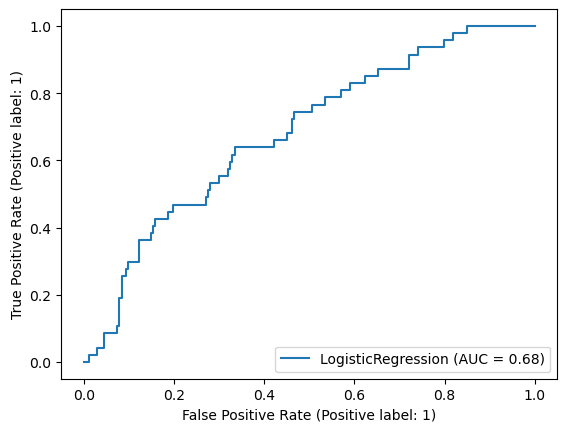

In [51]:
#LOCALLY LINEAR EMBEDDING
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components = 3)
x_lle = embedding.fit_transform(X)

evaluate_model(lr, x_lle, y)
print(cross_val_score(lr,x_lle,y,cv=10).mean())

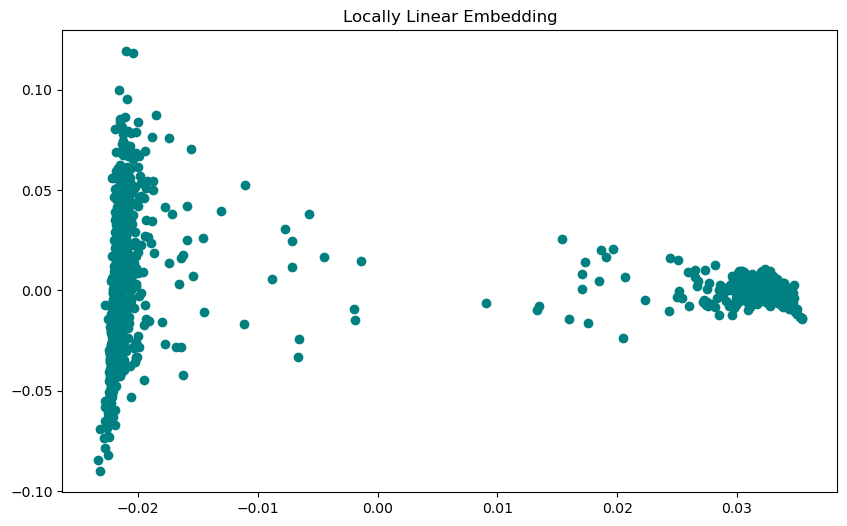

In [52]:
# Visualize results
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_lle[:, 0], x_lle[:, 1], c='teal', cmap=plt.cm.Spectral)
ax.set_title("Locally Linear Embedding")
plt.show()

In [53]:
#T-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING
from sklearn.manifold import TSNE

tsne = TSNE (n_components = 3, verbose = 2, perplexity = 40, n_iter=300)
X_tsne = tsne.fit_transform(X);

evaluate_model = (lr,X_tsne,y)
print(cross_val_score(lr,X_tsne,y,cv = 10).mean)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1470 samples in 0.003s...
[t-SNE] Computed neighbors for 1470 samples in 0.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1470
[t-SNE] Computed conditional probabilities for sample 1470 / 1470
[t-SNE] Mean sigma: 0.550867
[t-SNE] Computed conditional probabilities in 0.100s
[t-SNE] Iteration 50: error = 70.9680252, gradient norm = 0.0774709 (50 iterations in 2.503s)
[t-SNE] Iteration 100: error = 70.7338791, gradient norm = 0.0583576 (50 iterations in 2.378s)
[t-SNE] Iteration 150: error = 68.6848526, gradient norm = 0.0509721 (50 iterations in 2.052s)
[t-SNE] Iteration 200: error = 68.6155701, gradient norm = 0.0601820 (50 iterations in 1.667s)
[t-SNE] Iteration 250: error = 68.6134567, gradient norm = 0.0665229 (50 iterations in 1.576s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.613457
[t-SNE] Iteration 300: error = 1.9215353, gradient norm = 0.0009773 (50 iterations in 1.374s